In [1]:
import pandas as pd
import sklearn
from scipy.stats import mode
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

C:\Users\dongx\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("challengeTrainLabeled.csv")

In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data = data.drop(['Unnamed: 0','patient_id','Release_Cycle','Q11','Status','Race1','Q5','Q6','Q7','Q8','Q9','pregnancy_test','last_alcohol'], axis=1)
'''
'Exam_period','Country','US_citizen','Language','Self_respond_sp',
'Self_respond2_sp','Interview_lang','Self_respond_fam','Self_respond2_fam','Num_household','Num_family','Num_young_child',
'Num_adolescent','Num_elder','HH_gender','HH_age','HH_country','HH_education','HH_marital','Income_household','Income_family',
'Income_ratio',
'''

"\n'Exam_period','Country','US_citizen','Language','Self_respond_sp',\n'Self_respond2_sp','Interview_lang','Self_respond_fam','Self_respond2_fam','Num_household','Num_family','Num_young_child',\n'Num_adolescent','Num_elder','HH_gender','HH_age','HH_country','HH_education','HH_marital','Income_household','Income_family',\n'Income_ratio',\n"

In [5]:
# data = data.dropna(how='any',subset=['hepatitis_A_test','hepatitis_D_test','hepatitis_B_test','calcium_level','glucose_level','iron_level','virusE_infect_status'])

In [6]:
# data.dtypes

In [7]:
# data.iloc[:,20:40]

In [8]:
data = data[data['Age']!=0]
data = data.replace(' ', np.nan, regex=True)
data['Q27'] = data['Q27'].astype('float64')
# data.dtypes

In [9]:
'''
for column in list(data.columns[data.isnull().sum() > 0]):
    # mode_val = data[column].mode()[0]
    data[column].fillna(-1, inplace=True)
'''
for column in list(data.columns[data.isnull().sum() > 0]):
    mode_val = data[column].mode()[0]
    data[column].fillna(mode_val, inplace=True)

In [10]:
data.iloc[:,0:20]

,Gender,Age,Race2,Exam_period,Country,US_citizen,Language,Self_respond_sp,Self_respond2_sp,Interview_lang,Self_respond_fam,Self_respond2_fam,Num_household,Num_family,Num_young_child,Num_adolescent,Num_elder,HH_gender,HH_age,HH_country
0,1.0,63.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,63.0,1.0
1,2.0,16.0,4.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,6.0,6.0,1.0,3.0,0.0,1.0,37.0,1.0
2,1.0,22.0,6.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,4.0,4.0,0.0,0.0,0.0,1.0,53.0,2.0
3,2.0,63.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,64.0,1.0
4,1.0,63.0,4.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,0.0,0.0,2.0,2.0,63.0,1.0
5,2.0,31.0,6.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,31.0,2.0
7,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,2.0,19.0,1.0
8,2.0,54.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,2.0,54.0,1.0
9,1.0,54.0,6.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,0.0,1.0,0.0,1.0,54.0,2.0
10,1.0,80.0,6.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,5.0,5.0,0.0,0.0,1.0,1.0,80.0,2.0


[6048, 1488]


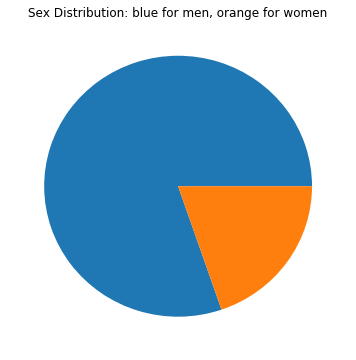

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
sex = data['Country'].values.tolist()
p=0
q=0
for i in sex:
    if i == 1:
        p+=1
    else:
        q+=1
sex=[p,q]
print(sex)
plt.figure(1, figsize=(6,6))
plt.pie(sex)
plt.title('Sex Distribution: blue for men, orange for women')
plt.show()

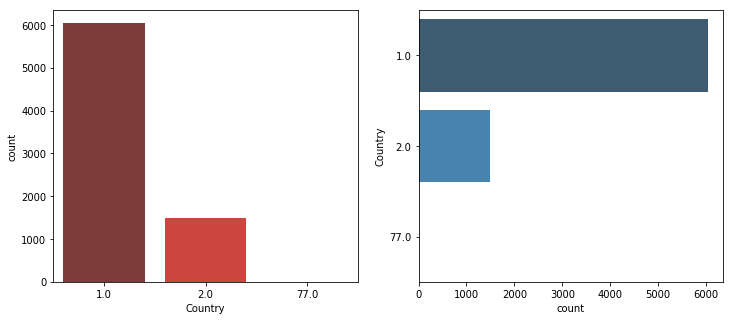

In [35]:
import seaborn as sns
titanic = data['Country']
fig, axes = plt.subplots(1,2,figsize=(12, 5))
sns.countplot(x=titanic, palette="Reds_d", ax=axes[0])
sns.countplot(y=titanic, palette="Blues_d", ax=axes[1])


In [13]:
X = data_matrix[:,:-1]
y = data_matrix[:,-1]
# print(X)
X = preprocessing.scale(X)

In [14]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME", n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)
# print("Score:", bdt.score(X_test,y_test))
scores = cross_val_score(bdt, X, y, cv=5)
print("Score:", scores.mean())

Score: 0.8600049459727286


In [15]:
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv=5)
print("Score:", scores.mean())

Score: 0.8140902138385149


In [16]:
clf_1 = SVC(C=1.0, kernel='rbf', gamma=0.1)
clf_1.fit(X, y)
scores = cross_val_score(clf_1, X, y, cv=5)
print("Score:", scores.mean())

Score: 0.7967091680029007


In [17]:
clf_1 = SVC(C=2.0, kernel='rbf', gamma=0.1)
clf_1.fit(X, y)
scores = cross_val_score(clf_1, X, y, cv=5)
print("Score:", scores.mean())

Score: 0.800822333971088


In [18]:
clf_1 = SVC(C=1.0, kernel='sigmoid', gamma=0.1)
clf_1.fit(X, y)
scores = cross_val_score(clf_1, X, y, cv=5)
print("Score:", scores.mean())

Score: 0.7300963320595841


In [19]:
clf_1 = SVC(C=2.0, kernel='sigmoid', gamma=0.1)
clf_1.fit(X, y)
scores = cross_val_score(clf_1, X, y, cv=5)
print("Score:", scores.mean())

Score: 0.7278409860967122


In [20]:
clf_1 = LogisticRegression(penalty='l1')
clf_1.fit(X, y)
scores = cross_val_score(clf_1, X, y, cv=5)
print("Score:", scores.mean())

Score: 0.8170101858876085


In [21]:
clf_1 = LogisticRegression(penalty='l2')
clf_1.fit(X, y)
scores = cross_val_score(clf_1, X, y, cv=5)
print("Score:", scores.mean())

Score: 0.8171430759022


In [22]:
clf_1 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_1.fit(X, y)
scores = cross_val_score(clf_1, X, y, cv=5)
print("Score:", scores.mean())

Score: 0.7915340260041996


In [23]:
clf_1 = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
clf_1.fit(X, y)
scores = cross_val_score(clf_1, X, y, cv=5)
print("Score:", scores.mean())

Score: 0.8113046279167598


In [24]:
data_pre = pd.read_csv("challengeTestUnlabeled.csv")
data1 = data_pre.drop(['Unnamed: 0','patient_id','Release_Cycle','Q11','Status','Race1','Q5','Q6','Q7','Q8','Q9','pregnancy_test','last_alcohol'], axis=1)
data1 = data1.replace(' ', np.nan, regex=True)
data1['Q27'] = data1['Q27'].astype('float64')
for column in list(data1.columns[data1.isnull().sum() > 0]):
    mode_val = data1[column].mode()[0]
    data1[column].fillna(mode_val, inplace=True)
X_pre = data1.values
X_pre = preprocessing.scale(X_pre)
print(X_pre)

[[ 0.99949071  1.45537232 -0.14153495 ... -1.57583362  0.05537073
  -0.96103838]
 [ 0.99949071  1.45537232 -0.76308553 ... -0.63488225  0.05537073
   1.21415984]
 [ 0.99949071  1.64708971 -1.3846361  ...  0.56564191  0.05537073
  -1.58252358]
 ...
 [-1.00050955 -1.22867114 -0.76308553 ... -0.24552307  0.05537073
  -0.02881057]
 [ 0.99949071 -1.26701462 -1.3846361  ... -0.24552307  0.05537073
  -0.02881057]
 [ 0.99949071 -1.07529723 -0.14153495 ... -0.24552307  0.05537073
   0.90341723]]


In [25]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME", n_estimators=200, learning_rate=0.8)
bdt.fit(X_train, y_train)
y_pre = bdt.predict(X_pre)
print(y_pre)
fileObject = open('predictions.csv', 'w')
for ip in y_pre:
    fileObject.write(str(ip))
    fileObject.write('\n')
fileObject.close()

NameError: name 'X_train' is not defined